In [1]:
# Import Libraries
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Dataset
m = 0.7
c = 0.3

X = np.arange(0,1,0.02)
y = m*X+c

print("Shape of X = ",X.shape)
print("Shape of y = ", y.shape)


Shape of X =  (50,)
Shape of y =  (50,)


In [3]:
# Manual Split Logic
split = int(len(X)*0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40,) (40,)
(10,) (10,)


In [4]:
# Function for Visualization
def plot_data(X_train=X_train, y_train=y_train, X_test = X_test, y_test = y_test, predictions=None):

    plt.figure(figsize=(8,6))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('X vs Y')
    plt.scatter(X_train, y_train, c='b', s=8, label='Training Data')
    plt.scatter(X_test, y_test, c='r', s=8, label='Testing Data')
    if predictions is not None:
        plt.scatter(X_test, predictions, c='g', s=8, label='Predicted Data')

    plt.legend()

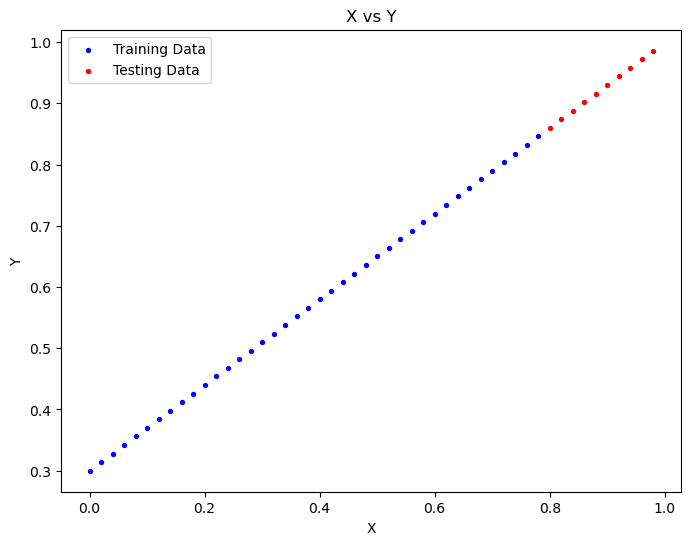

In [5]:
# Call the function
plot_data()

In [6]:
# Initialize random weight and bias
W = np.random.randn(1)
b = np.random.randn(1)
print(W,b)

[2.4780789] [1.08642205]


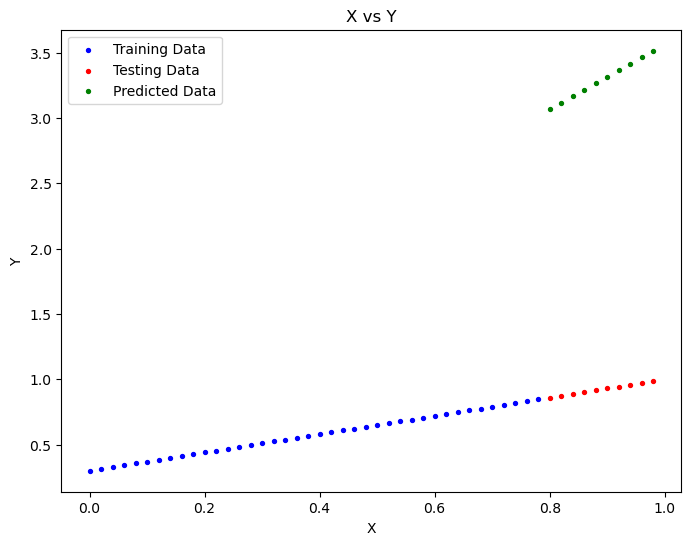

In [7]:
# View the initial prediction
y_out = X_test*W + b
plot_data(predictions=y_out)

In [8]:
# Define a loss function
def loss_fn(y_true, y_pred):
    return np.sum(np.square(y_true-y_pred))/len(y_true)

In [9]:
# Build the training loop
epochs = 500
alpha = 0.1
trainLossList = []
testLossList = []
for epoch in range(epochs):
    # Forward Pass
    y_pred = X_train*W + b

    # Compute Train Loss
    train_loss = loss_fn(y_true=y_train, y_pred=y_pred)
    trainLossList.append(train_loss)

    # Compute the gradient
    gradientW = (-2*np.sum((y_train-y_pred)*X_train))/len(y_train)
    gradientb = (-2*np.sum(y_train-y_pred))/len(y_train)

    # Backpropagate
    W = W - alpha*gradientW
    b = b - alpha*gradientb

    # Compute Test Loss
    test_pred = X_test*W + b
    test_loss = loss_fn(y_true=y_test, y_pred=test_pred)
    testLossList.append(test_loss)

    if(epoch%10 == 0):
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f}| Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 2.35853| Test Loss: 3.82444
Epoch: 10 | Train Loss: 0.08110| Test Loss: 0.41356
Epoch: 20 | Train Loss: 0.05781| Test Loss: 0.25512
Epoch: 30 | Train Loss: 0.04801| Test Loss: 0.20677
Epoch: 40 | Train Loss: 0.03991| Test Loss: 0.17155
Epoch: 50 | Train Loss: 0.03318| Test Loss: 0.14259
Epoch: 60 | Train Loss: 0.02759| Test Loss: 0.11854
Epoch: 70 | Train Loss: 0.02293| Test Loss: 0.09855
Epoch: 80 | Train Loss: 0.01906| Test Loss: 0.08192
Epoch: 90 | Train Loss: 0.01585| Test Loss: 0.06811
Epoch: 100 | Train Loss: 0.01318| Test Loss: 0.05662
Epoch: 110 | Train Loss: 0.01095| Test Loss: 0.04707
Epoch: 120 | Train Loss: 0.00911| Test Loss: 0.03913
Epoch: 130 | Train Loss: 0.00757| Test Loss: 0.03253
Epoch: 140 | Train Loss: 0.00629| Test Loss: 0.02704
Epoch: 150 | Train Loss: 0.00523| Test Loss: 0.02248
Epoch: 160 | Train Loss: 0.00435| Test Loss: 0.01869
Epoch: 170 | Train Loss: 0.00362| Test Loss: 0.01554
Epoch: 180 | Train Loss: 0.00301| Test Loss: 0.01292
Epoc

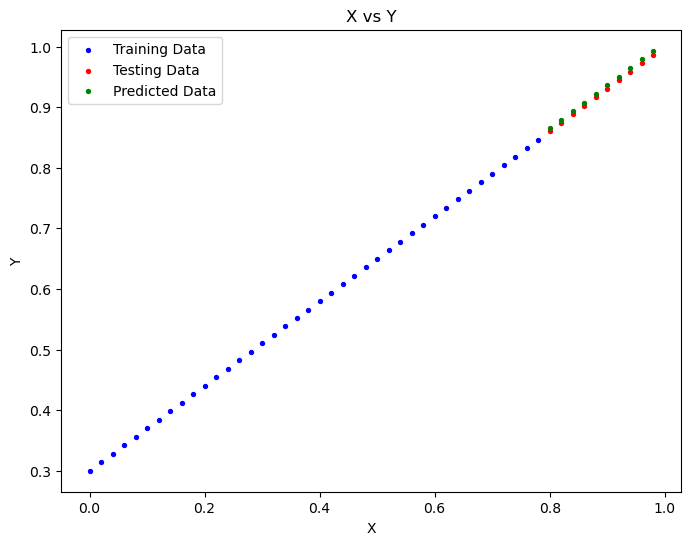

In [10]:
# Get the predictions
y_out = X_test*W + b
plot_data(predictions=y_out)

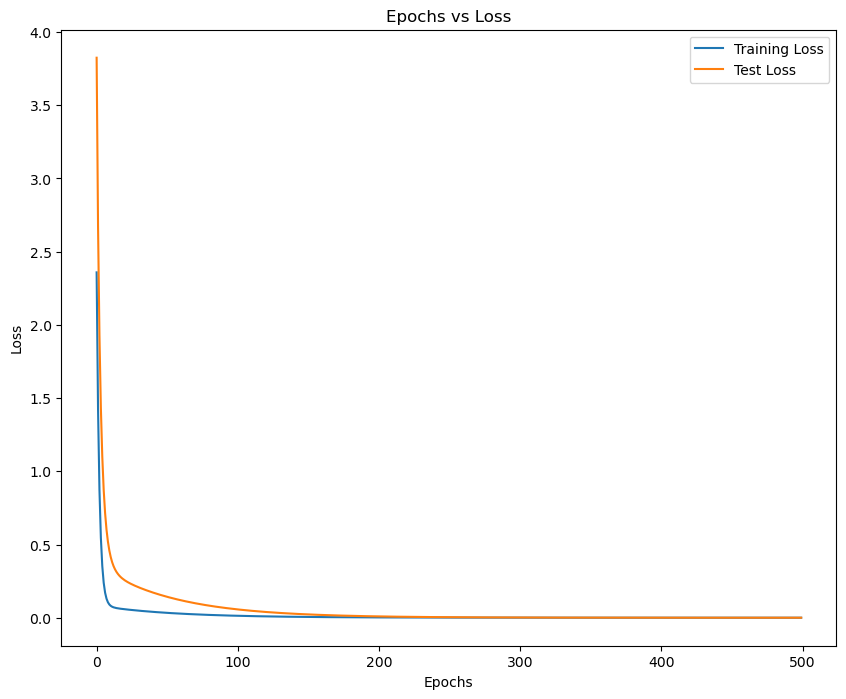

In [11]:
# Plot Loss Curve
plt.figure(figsize=(10,8))
plt.plot(range(epochs), trainLossList, label="Training Loss")
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend();